# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


(4234042, 5)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [6]:
train.isnull().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [7]:
test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

In [8]:
train = train.fillna('')
test = test.fillna('')

In [9]:
train.isnull().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

In [10]:
test.isnull().sum()

title          0
description    0
itemid         0
dtype: int64

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [11]:
train['text'] = train.title + " " + train.description

In [12]:
test['text'] = test.title + " " + test.description

In [93]:
test.text, train.text

(0          Мастерка Мастерка фирмы форвард. Белого цвета....
 1          Зимние сапоги Продаю зимние сапоги, в хорошем ...
 2          Видеонаблюдение 8 камер В комплект Atis AMD-2M...
 3                              Запчасти для GLE Запчасти GLE
 4          Бластер nerf Состояние 5+/\nПродаю потому что ...
                                  ...                        
 1411343    Бетоносмеситель Россия бсэ-140 чугун Бетономеш...
 1411344    Разношрокие колеса R19 оригинал Porsche Paname...
 1411345    Комбенз зимний размер Комбензон на овчине .Под...
 1411346    Смартфон Honor 5C В отличном состоянии. Исполь...
 1411347    Слипоны Ralph Lauren 6.5 Новые без коробки , п...
 Name: text, Length: 1411348, dtype: object,
 0          Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ...
 1          Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
 2          Возвму машину с выкупом Возьму машину в аренду...
 3          Полусапожки полусапожки в отличном состоянии, ...
 4          Босоножки кож

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [12]:
# Сколько всего уникальных классов необходимо предсказать?
vc = train.Category_name.value_counts()
vc.head()

Одежда, обувь, аксессуары     765120
Запчасти и аксессуары         740701
Детская одежда и обувь        577499
Товары для детей и игрушки    206517
Мебель и интерьер             156737
Name: Category_name, dtype: int64

In [13]:
vc.count()

50

In [14]:
#Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
vc = (vc / vc.sum()) * 100
vc.head()

Одежда, обувь, аксессуары     18.070676
Запчасти и аксессуары         17.493946
Детская одежда и обувь        13.639425
Товары для детей и игрушки     4.877538
Мебель и интерьер              3.701829
Name: Category_name, dtype: float64

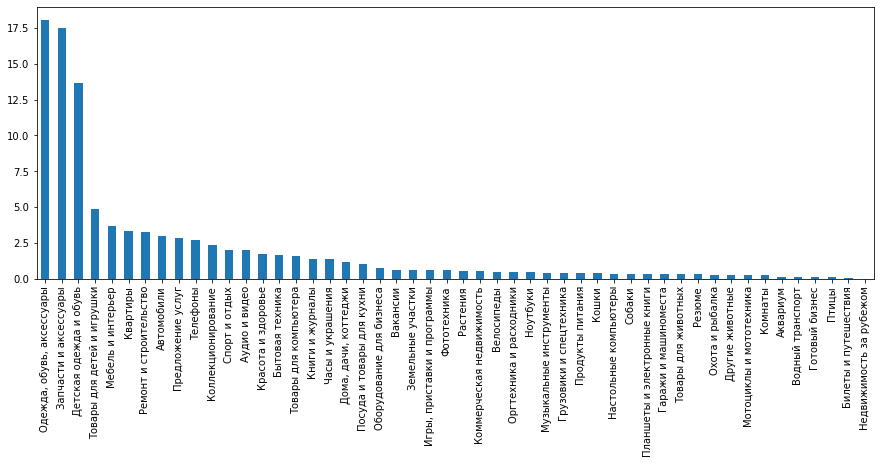

In [15]:
#Постройте столбчатую диаграмму распределения по классам. 

pl = vc.plot.bar(x='lab', y='val', rot=90, figsize=(15,5))

In [16]:
#На сколько большой дисбаланс?
print("Самая большая доля: ", vc.idxmax(), vc.max())
print("Самая малая доля: ", vc.idxmin(), vc.min())
print("Дисбаланс большой. Разброс долей классов (%): ", vc.max() - vc.min())

Самая большая доля:  Одежда, обувь, аксессуары 18.07067572782698
Самая малая доля:  Недвижимость за рубежом 0.0038969854337769913
Дисбаланс большой. Разброс долей классов (%):  18.066778742393204


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()

In [32]:
X_training = cv.fit_transform(train.text[:500000])

In [19]:
X

<100000x230691 sparse matrix of type '<class 'numpy.int64'>'
	with 3577849 stored elements in Compressed Sparse Row format>

In [20]:
pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names())

,00,000,0000,000000,0000000,00000000191668,00000002315,0000000234238,0000000259699,0000000310604,...,➊гарантия,➋в,➍все,云南下关沱茶集团,天上天下,浮世絵,美人画,𝑴𝒂𝒚𝒐𝒓𝒂𝒍,𝓓𝓤𝓚𝓐_𝓲𝓻𝓴,𝓢𝓱𝓸𝔀𝓻𝓸𝓸𝓶
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [21]:
vocab = cnt_vec.vocabulary_

In [22]:
#слова начинаются на цифру
sum(x[0].isdigit() for x in vocab.keys())

33400

In [23]:
#слова начинаются на пунктуацию
from string import punctuation as pun
sum(x[0] in pun for x in vocab.keys())

168

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [14]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('russian')
import regex
import demoji
demoji.download_codes()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alinazabolotskaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alinazabolotskaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


... OK (Got response in 0.60 seconds)
Writing emoji data to /Users/alinazabolotskaya/.demoji/codes.json ...
... OK


In [83]:

def tize(s):
    s = s.lower()
    #nopun = regex.compile(r'[\p{C}|\p{M}|\p{P}|\p{S}|\p{Z}]+', regex.UNICODE)
    #nopun.sub(" ", s)
    #s = demoji.replace(s, '') #я не удержалась, там миллион этих эмодзи
    #s = [x for x in s if (any(char.isdigit() for char in x) == False) and (any(char in pun for char in x) == False) and (x not in stopwords.words('russian'))]
    #s = [x for x in s if any(char in pun for char in x) == False]
    
    s = word_tokenize(s)
    #s = [x for x in s if x.isalpha()]
    s = [stemmer.stem(x) for x in s if x.isalpha() and x not in stopwords.words('russian')]
    return s

In [172]:
example = train.sample(5000)
example.head()

,title,description,Category_name,Category,text
1403594,Сумка Cromia,"Кожаная сумка Cromia, коричневая с золотистой ...","Одежда, обувь, аксессуары",27,"Сумка Cromia Кожаная сумка Cromia, коричневая ..."
4067591,Найден котёнок,Найден котёнок (девочка) в районе ПГУ (останов...,Кошки,90,Найден котёнок Найден котёнок (девочка) в райо...
3589546,Айфон 7 32гб,Отличное состояние. Пользовадась девушка. Всег...,Телефоны,84,Айфон 7 32гб Отличное состояние. Пользовадась ...
2811051,Казан чугунный 50 л СССР,Новый с воинского хранения в комплекте с дерев...,Коллекционирование,36,Казан чугунный 50 л СССР Новый с воинского хра...
603921,Молодой котик ищет дом,"Юный, но очень галантный Туманчик ждёт своего ...",Кошки,90,"Молодой котик ищет дом Юный, но очень галантны..."


In [183]:
cv = CountVectorizer(tokenizer = lambda x: tize(x))

In [188]:
X = cv.fit_transform(rand.text)

In [195]:
X

<500000x188062 sparse matrix of type '<class 'numpy.int64'>'
	with 14939015 stored elements in Compressed Sparse Row format>

In [189]:
y = rand["Category"]
y

3157553     9
357336     27
1816451    29
291302     21
1129046    27
           ..
418893     30
797371     10
781671     27
2496734    25
4225611    29
Name: Category, Length: 500000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sgd = SGDClassifier()

In [192]:
sgd.fit(X_train, y_train)

SGDClassifier()

In [193]:
predict_test = sgd.predict(X_test)
predict_test[:5], y_test[:5]

(array([29, 27, 10, 32, 10]),
 1899573    29
 73751      27
 2814427    10
 2311844    84
 999635     10
 Name: Category, dtype: int64)

In [194]:

accuracy_score(y_test, predict_test)

0.85123

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


### 8.1

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(tokenizer = lambda x: tize(x))
X = tv.fit_transform(rand.text)

In [198]:
X

<500000x188062 sparse matrix of type '<class 'numpy.float64'>'
	with 14939015 stored elements in Compressed Sparse Row format>

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
predict_test = sgd.predict(X_test)
predict_test[:5], y_test[:5]

(array([27, 84, 27, 27, 29]),
 2051491    29
 2672922    84
 1455495    29
 627369     27
 3365572    29
 Name: Category, dtype: int64)

In [200]:
accuracy_score(y_test, predict_test)

0.83609

### Качество примерно одинаковое (на выборке в 5к здесь было наоборот лучше на 0.02)

### 8.2

In [201]:
tv2 = TfidfVectorizer(tokenizer = lambda x: tize(x), max_df=0.9)
X = tv2.fit_transform(rand.text)

In [202]:
X

<500000x188062 sparse matrix of type '<class 'numpy.float64'>'
	with 14939015 stored elements in Compressed Sparse Row format>

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
predict_test = sgd.predict(X_test)
predict_test[:5], y_test[:5]

(array([30, 10, 10, 32,  9]),
 3048010     30
 773452       9
 3863309     87
 2986283    101
 274634       9
 Name: Category, dtype: int64)

In [204]:
accuracy_score(y_test, predict_test)

0.83361

### Качество и размер примерно одинаковые. Наверное, потому что недостаточно большой образец, или максимальный df надо ставить меньше 0.9

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [78]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(tokenizer = lambda x: tize(x), n_features=30000)
#X = hv.fit_transform(rand.text)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
predict_test = sgd.predict(X_test)
predict_test[:5], y_test[:5]

(array([19, 10, 27, 24, 27]),
 1677394     36
 1890258     10
 2748041     27
 2368150     24
 1190723    114
 Name: Category, dtype: int64)

In [207]:
accuracy_score(y_test, predict_test)

0.8099

CountVectorizer лучше всех, HashingVectorizer хуже всех

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [92]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x7fbf79026040>
Traceback (most recent call last):
  File "/Users/alinazabolotskaya/opt/anaconda3/lib/python3.8/site-packages/nltk/data.py", line 1159, in __del__
    if not self.closed:
  File "/Users/alinazabolotskaya/opt/anaconda3/lib/python3.8/site-packages/nltk/data.py", line 1179, in closed
    return self.stream.closed
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'


In [18]:
X_train = train.text
y_train = train.Category
X_test = test.text

In [116]:
count_vectorizer = CountVectorizer(binary=True)
tfidf_transformer = TfidfTransformer(use_idf=True) 


In [117]:
dataTrain = count_vectorizer.fit_transform(X_train)

In [118]:
tfidf_train_data = tfidf_transformer.fit_transform(dataTrain)

In [119]:
testData = count_vectorizer.transform(X_test)

In [120]:
tfidf_test_data = tfidf_transformer.transform(testData)

In [121]:
sgd = SGDClassifier()
sgd.fit(dataTrain, y_train)

SGDClassifier()

In [122]:
y_test = sgd.predict(testData)
y_test

array([27, 27, 32, ..., 29, 84, 29])

In [17]:
import numpy as np

Тренирую модель и делаю предсказание

In [126]:
y_test

array([27, 27, 32, ..., 29, 84, 29])

In [130]:
df = pd.DataFrame(data={'ID': test['itemid'], 'Category': y_test})

In [131]:
itog = df.to_csv('predictions_itog.csv', index=False)

In [128]:
test.head()

,title,description,itemid,text
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,Мастерка Мастерка фирмы форвард. Белого цвета....
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLE Запчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerf Состояние 5+/\nПродаю потому что ...


In [119]:
vc = train.Category.value_counts()
vc1 = train.Category_name.value_counts()
vc, vc1

(27     765120
 10     740701
 29     577499
 30     206517
 20     156737
 24     142236
 19     138691
 9      125778
 114    120152
 84     113684
 36     100606
 39      85369
 32      83332
 88      72445
 21      70938
 101     68078
 83      59055
 28      58930
 25      48234
 87      42540
 40      32136
 111     27109
 26      27016
 97      26325
 105     24786
 106     23113
 42      21930
 34      19488
 99      19472
 98      18456
 38      17520
 81      17167
 82      16987
 90      15440
 31      14921
 89      13713
 96      13700
 85      13327
 94      13276
 112     13049
 102     12169
 93      11875
 14      11847
 23      11679
 92       5231
 11       4879
 116      4124
 91       3614
 33       2886
 86        165
 Name: Category, dtype: int64,
 Одежда, обувь, аксессуары       765120
 Запчасти и аксессуары           740701
 Детская одежда и обувь          577499
 Товары для детей и игрушки      206517
 Мебель и интерьер               156737
 Квартиры          

In [112]:
smth = pd.concat([vc, train.Category_name.value_counts()], axis=1)
smth

,Category,Category_name
9,125778.0,NaN
10,740701.0,NaN
11,4879.0,NaN
14,11847.0,NaN
19,138691.0,NaN
...,...,...
Товары для детей и игрушки,NaN,206517.0
Товары для животных,NaN,13276.0
Товары для компьютера,NaN,68078.0
Фототехника,NaN,24786.0
